Come vi avevo accennato, mi interessa capire la robustezza rispetto:
- al livello di rumore
- alla dimensione del campione da far ascoltare per ottenere un risultato.

In entrambi i casi, mi aspetto dei grafici che fanno vedere, al variare di una variabile (livello di rumore, lunghezza del campione) il risultato del riconoscimento (può essere una variabile Corretto / sbagliato). Gli esperimento vanno fatti considerando più brani e ripetuti più volte per ciascun brano.

In [1]:
import pickle
import numpy as np
import scipy.io.wavfile as wav
import functions as f
import os
import matplotlib.pyplot as plt
import pandas as pd
from pydub import AudioSegment
from cycler import cycler
import librosa

f.remove_short_recordings_start('converted_memo')
f.remove_created_audio_files_start('pitch')
f.remove_created_audio_files_start('white_noise')
f.remove_created_audio_files_start('clipping')


plt.rcParams['figure.dpi'] = 140
plt.rcParams['axes.prop_cycle'] = cycler(color = ['#7180AC', '#6A605C', 'b', 'y'])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'black'

Removed files in converted_memo/10_sec
Removed files in converted_memo/5_sec
Removed files in converted_memo/20_sec
Removed files in converted_memo/1_sec
Removed files in converted_memo/3_sec
Removed files in converted_memo/0.5_sec
----------------------
deleted files in directory pitch/goosebumps
deleted files in directory pitch/popstar
deleted files in directory pitch/tears
----------------------
----------------------
deleted files in directory white_noise/goosebumps
deleted files in directory white_noise/popstar
deleted files in directory white_noise/tears
----------------------
----------------------
deleted files in directory clipping/goosebumps
deleted files in directory clipping/popstar
deleted files in directory clipping/tears
----------------------


In [2]:
database = pickle.load(open('database_test.pickle', 'rb'))
song_name_index = pickle.load(open("song_test_index.pickle", "rb"))

# White Noise

### Goosebumps - White Noise

In [3]:
f.create_white_noise_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'white_noise/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/goosebumps/', database, song_name_index)

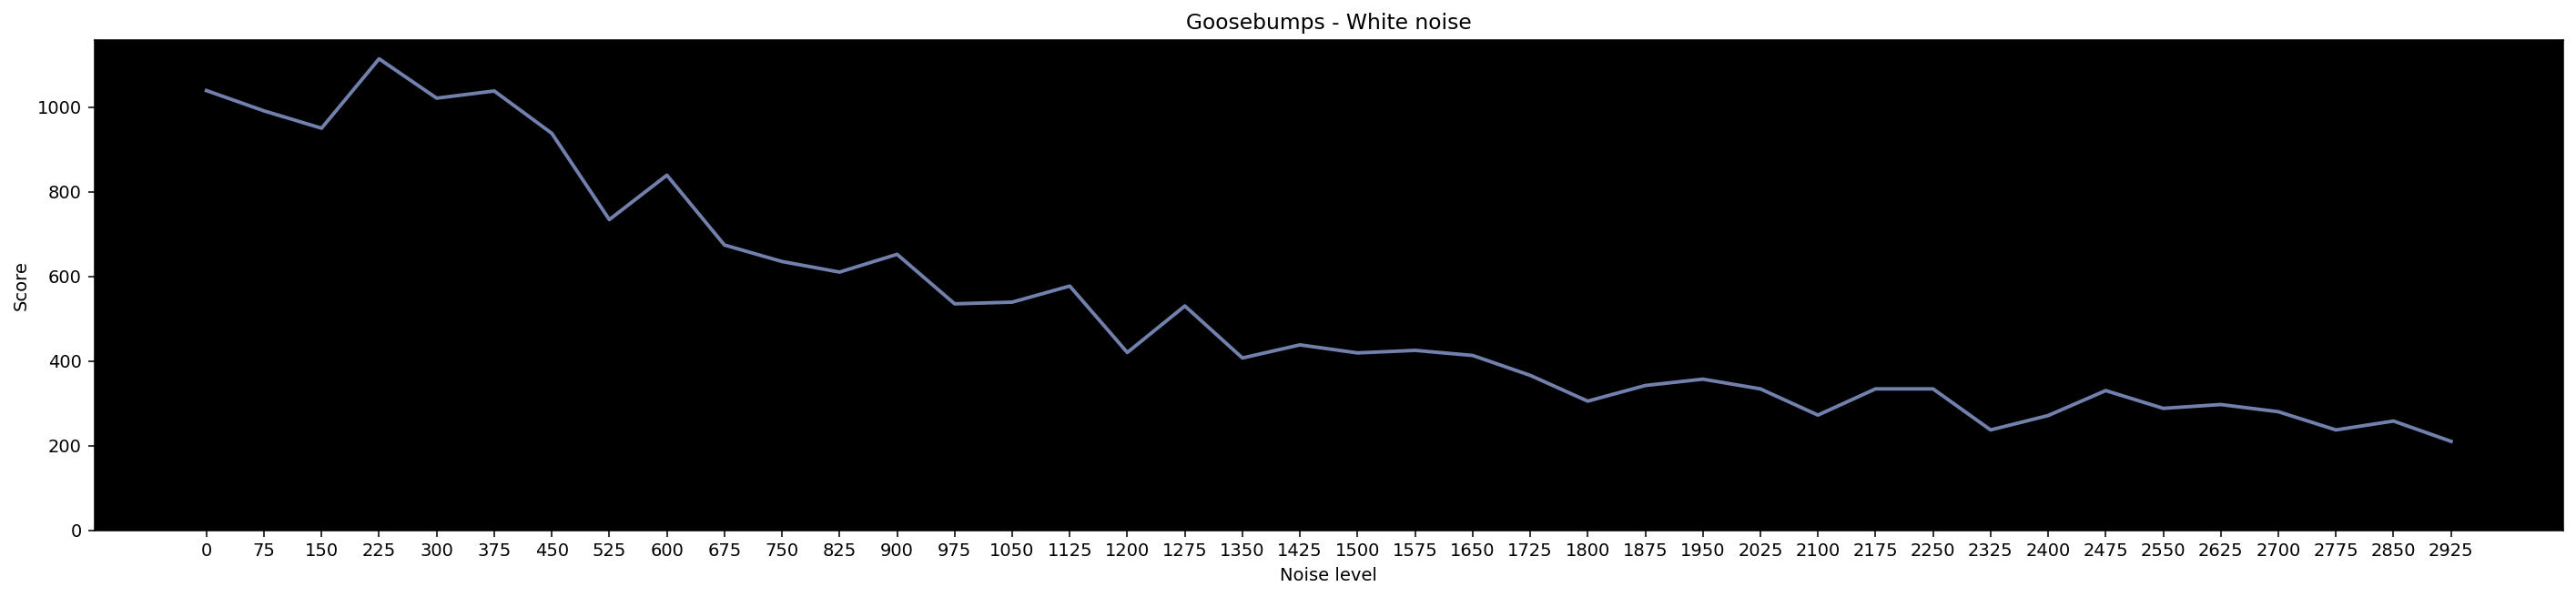

In [4]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - White noise')
plt.plot(os.listdir('white_noise/goosebumps/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/goosebumps/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [5]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['White noise level', 'Guessed song'])
df['White noise level'] = df['White noise level'].apply(lambda x: x.replace('white_noise_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('White noise level', inplace = True)
df

,Guessed song
White noise level,
0,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
75,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
150,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
225,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
300,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
375,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
450,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
525,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
600,"Travis Scott, HVME - Goosebumps (Remix - Offic..."


### Save Your Tears - White Noise

In [6]:
f.create_white_noise_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'white_noise/tears')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/tears/', database, song_name_index)

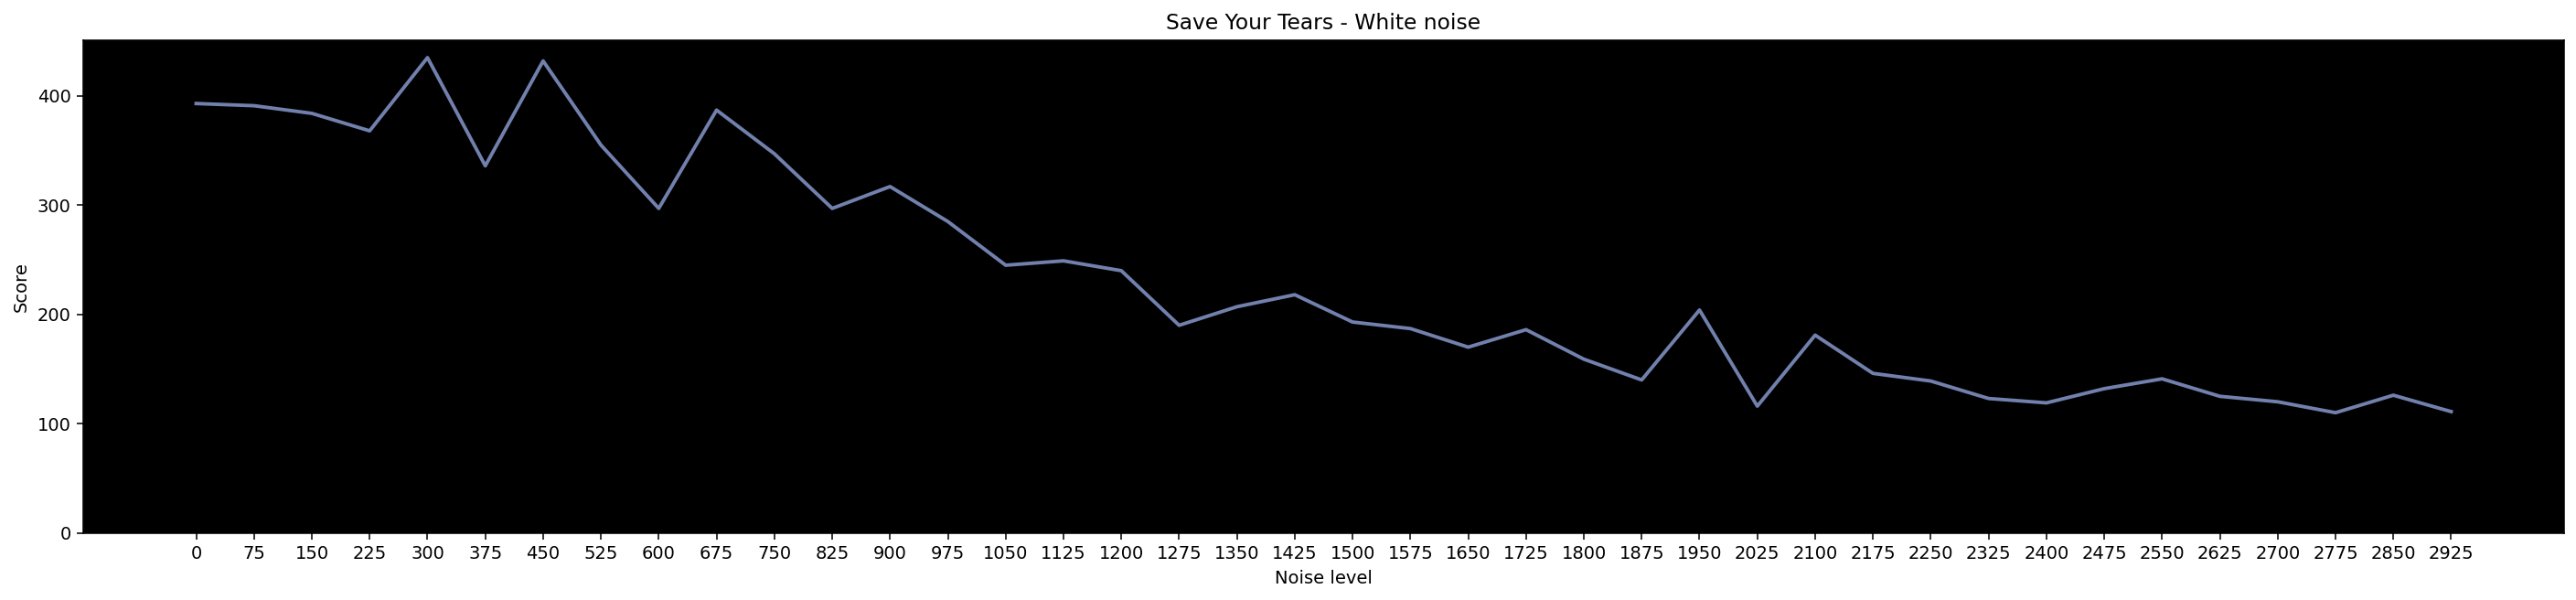

In [7]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - White noise')
plt.plot(os.listdir('white_noise/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/tears/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [8]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['White noise level', 'Guessed song'])
df['White noise level'] = df['White noise level'].apply(lambda x: x.replace('white_noise_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('White noise level', inplace = True)
df

,Guessed song
White noise level,
0,The Weeknd - Save Your Tears (Official Audio)
75,The Weeknd - Save Your Tears (Official Audio)
150,The Weeknd - Save Your Tears (Official Audio)
225,The Weeknd - Save Your Tears (Official Audio)
300,The Weeknd - Save Your Tears (Official Audio)
375,The Weeknd - Save Your Tears (Official Audio)
450,The Weeknd - Save Your Tears (Official Audio)
525,The Weeknd - Save Your Tears (Official Audio)
600,The Weeknd - Save Your Tears (Official Audio)


At noise level equal to 1700, the algorithm started detecting the wrong song indicating that even white noise at high levels can be a problem

### POPSTAR - White Noise

In [9]:
f.create_white_noise_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'white_noise/popstar')
list_of_right_songs, scores = f.scores_for_different_noise('white_noise/popstar/', database, song_name_index)

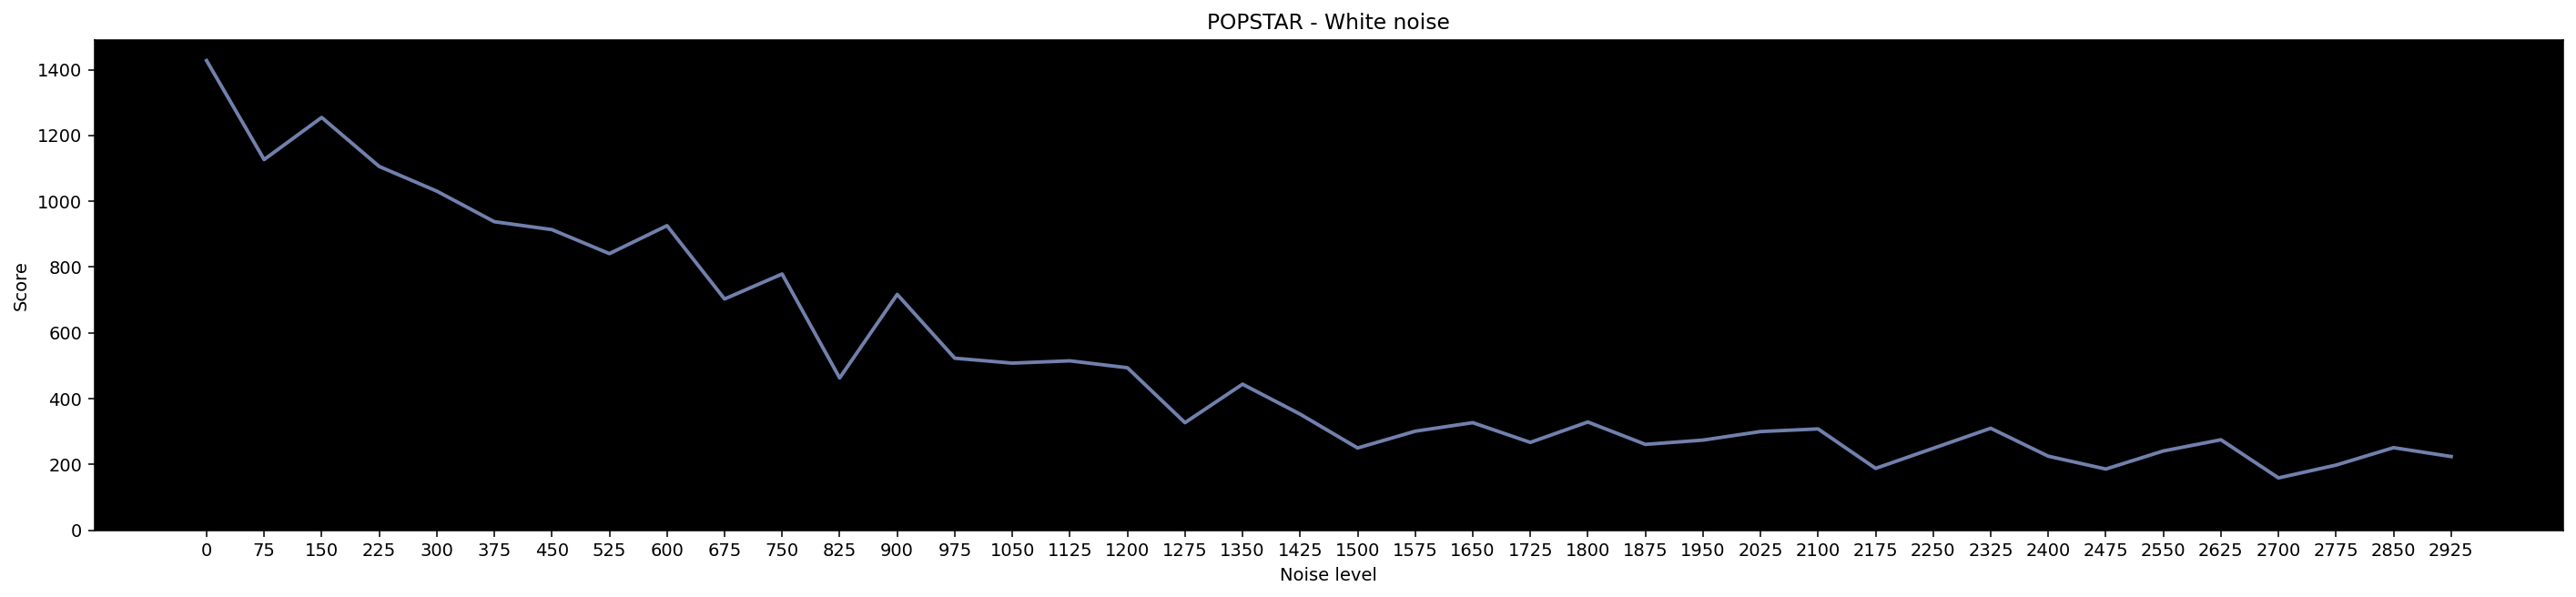

In [10]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - White noise')
plt.plot(os.listdir('white_noise/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 3000, 75)], ticks = os.listdir('white_noise/popstar/'))
plt.xlabel('Noise level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

Did the algorithm get the right song at every noise level?

In [11]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['White noise level', 'Guessed song'])
df['White noise level'] = df['White noise level'].apply(lambda x: x.replace('white_noise_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('White noise level', inplace = True)
df

,Guessed song
White noise level,
0,DJ Khaled ft. Drake - POPSTAR (Official Audio)
75,DJ Khaled ft. Drake - POPSTAR (Official Audio)
150,DJ Khaled ft. Drake - POPSTAR (Official Audio)
225,DJ Khaled ft. Drake - POPSTAR (Official Audio)
300,DJ Khaled ft. Drake - POPSTAR (Official Audio)
375,DJ Khaled ft. Drake - POPSTAR (Official Audio)
450,DJ Khaled ft. Drake - POPSTAR (Official Audio)
525,DJ Khaled ft. Drake - POPSTAR (Official Audio)
600,DJ Khaled ft. Drake - POPSTAR (Official Audio)


# Clipping
Clipping is a form of distortion that occurs when an amplifier is overdriven and attempts to deliver an output voltage beyond its maximum capability.

### Goosebumps - Clipping

In [12]:
f.create_clipped_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'clipping/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('clipping/goosebumps/', database, song_name_index)
score = scores[::-1]

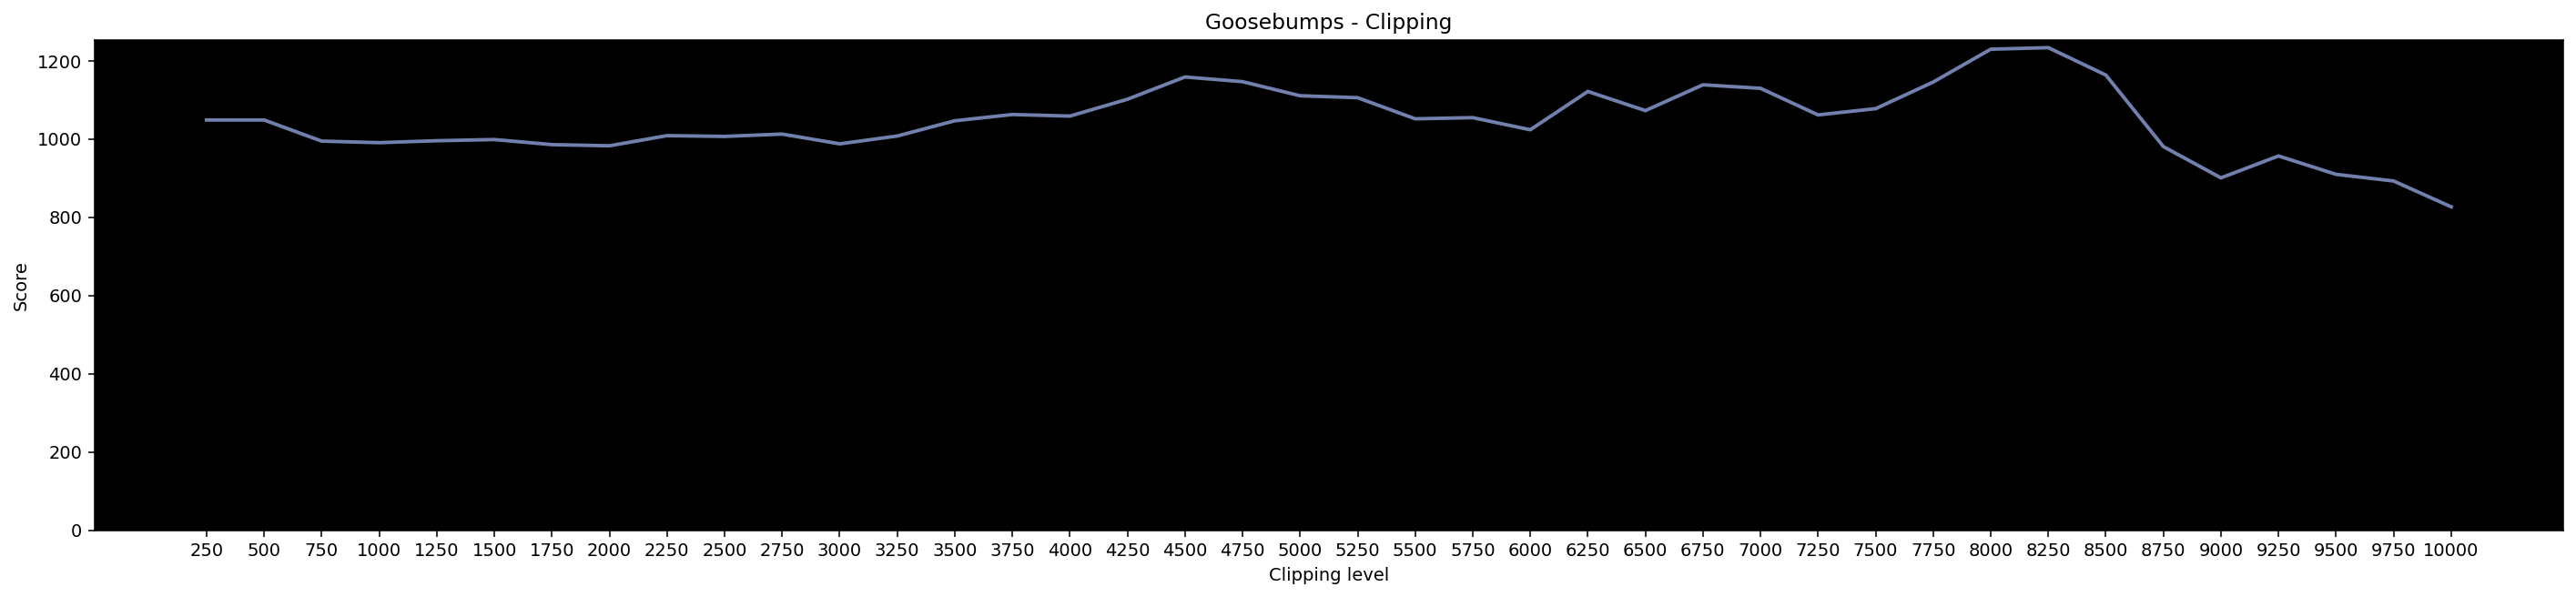

In [13]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - Clipping')
plt.plot(os.listdir('clipping/goosebumps/'), score)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/goosebumps/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [14]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Clipping level', 'Guessed song'])
df['Clipping level'] = df['Clipping level'].apply(lambda x: x.replace('clipping_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Clipping level', inplace = True)
df

,Guessed song
Clipping level,
250,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
500,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
750,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1000,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1250,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1500,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1750,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
2000,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
2250,"Travis Scott, HVME - Goosebumps (Remix - Offic..."


### Save Your Tears - Clipping

In [15]:
f.create_clipped_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'clipping/tears')
list_of_right_songs, score = f.scores_for_different_noise('clipping/tears/', database, song_name_index)
scores = score[::-1]

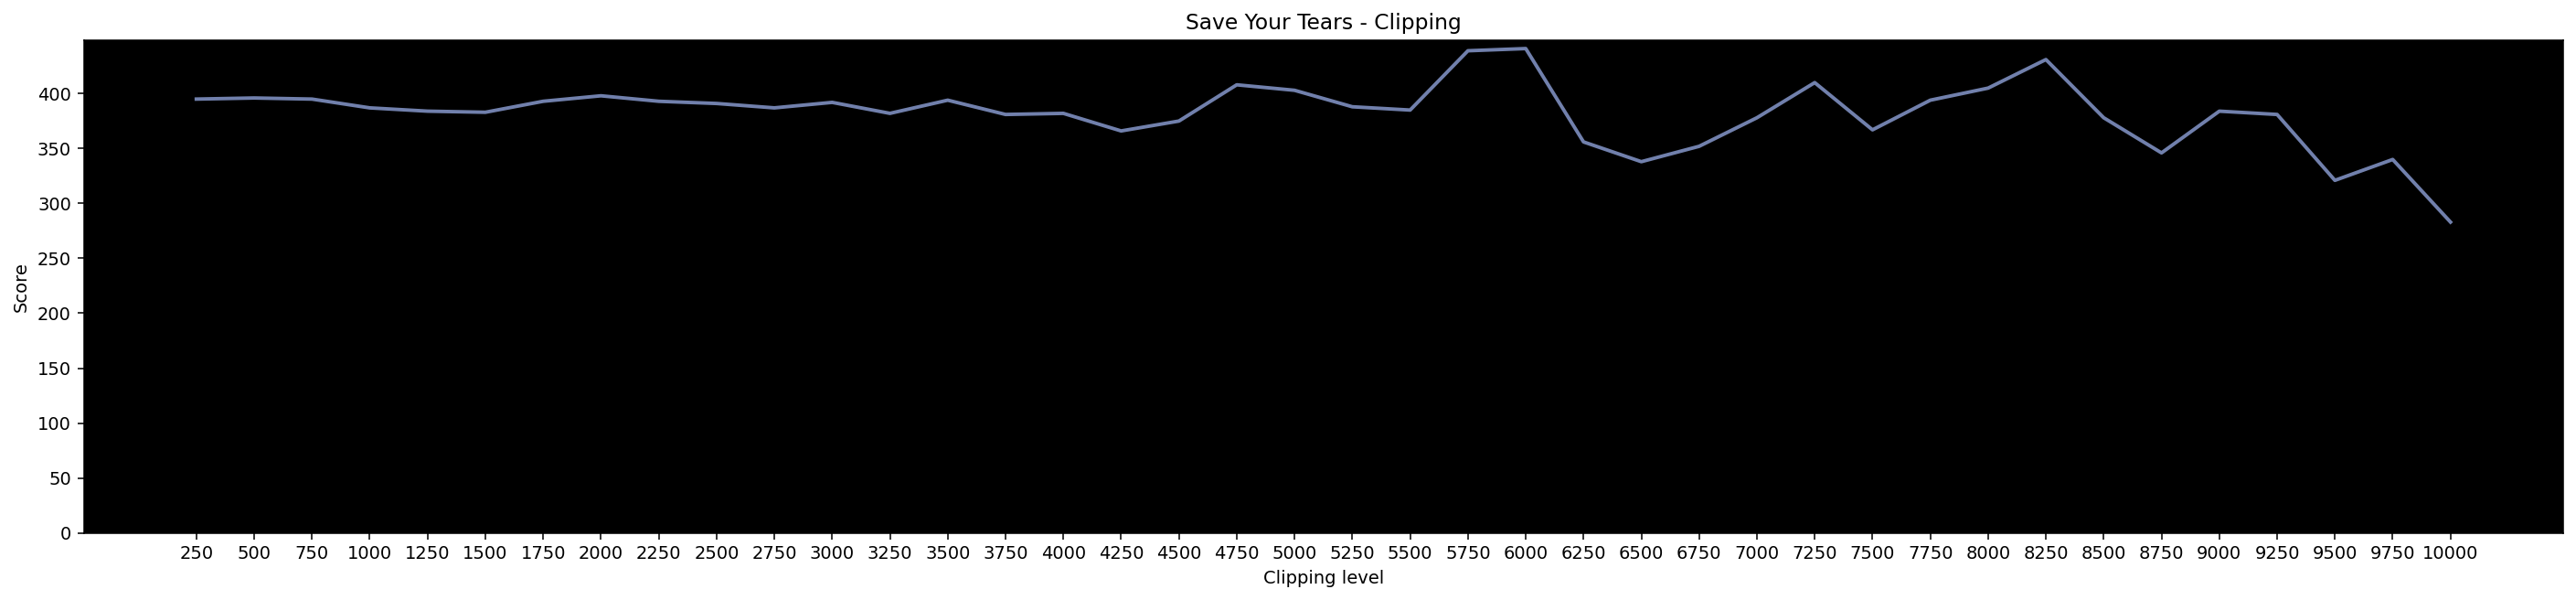

In [16]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - Clipping')
plt.plot(os.listdir('clipping/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/tears/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [17]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Clipping level', 'Guessed song'])
df['Clipping level'] = df['Clipping level'].apply(lambda x: x.replace('clipping_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Clipping level', inplace = True)
df

,Guessed song
Clipping level,
250,The Weeknd - Save Your Tears (Official Audio)
500,The Weeknd - Save Your Tears (Official Audio)
750,The Weeknd - Save Your Tears (Official Audio)
1000,The Weeknd - Save Your Tears (Official Audio)
1250,The Weeknd - Save Your Tears (Official Audio)
1500,The Weeknd - Save Your Tears (Official Audio)
1750,The Weeknd - Save Your Tears (Official Audio)
2000,The Weeknd - Save Your Tears (Official Audio)
2250,The Weeknd - Save Your Tears (Official Audio)


### POPSTAR - Clipping

In [18]:
f.create_clipped_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'clipping/popstar')
list_of_right_songs, score = f.scores_for_different_noise('clipping/popstar/', database, song_name_index)
scores = score[::-1]

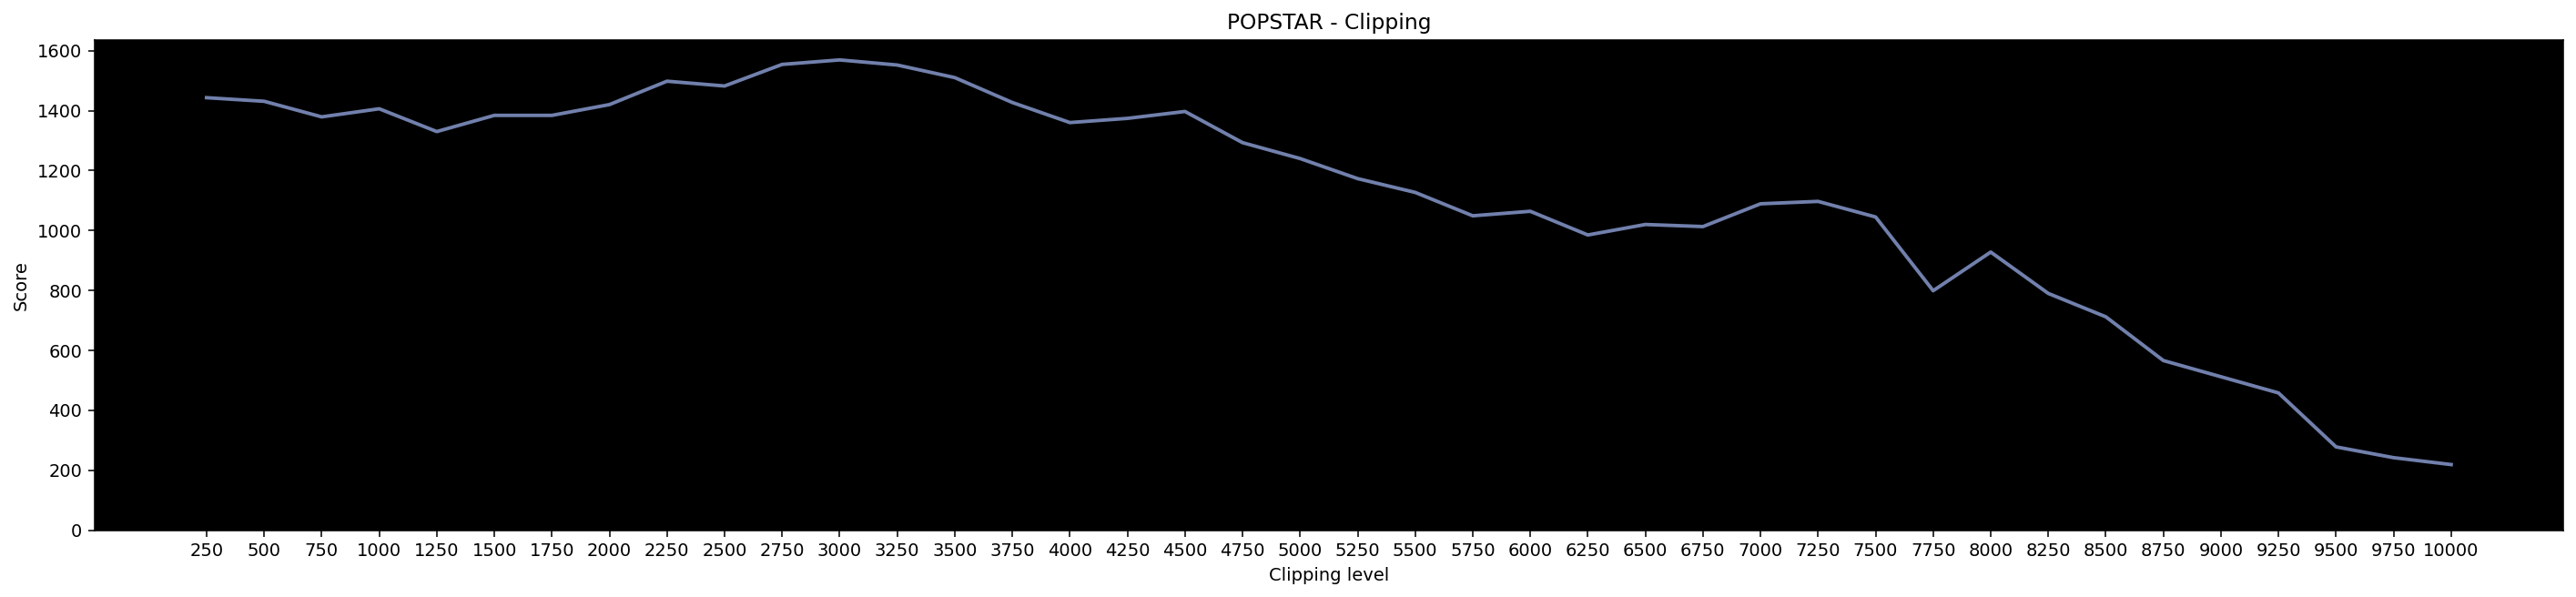

In [19]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - Clipping')
plt.plot(os.listdir('clipping/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(250, 10250, 250)], ticks = os.listdir('clipping/popstar/'))
plt.xlabel('Clipping level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [20]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Clipping level', 'Guessed song'])
df['Clipping level'] = df['Clipping level'].apply(lambda x: x.replace('clipping_', '').strip('.wav'))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Clipping level', inplace = True)
df

,Guessed song
Clipping level,
250,DJ Khaled ft. Drake - POPSTAR (Official Audio)
500,Post Malone - Wow. (Official Music Video)
750,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1000,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1250,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1500,DJ Khaled ft. Drake - POPSTAR (Official Audio)
1750,DJ Khaled ft. Drake - POPSTAR (Official Audio)
2000,DJ Khaled ft. Drake - POPSTAR (Official Audio)
2250,DJ Khaled ft. Drake - POPSTAR (Official Audio)


# Pitch shifting

### Goosebumps - Pitch shifting

In [21]:
f.create_pitched_files('converted_memo/original/Travis Scott, HVME - Goosebumps (Remix - Official Audio).wav', 'pitch/goosebumps')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/goosebumps/', database, song_name_index)

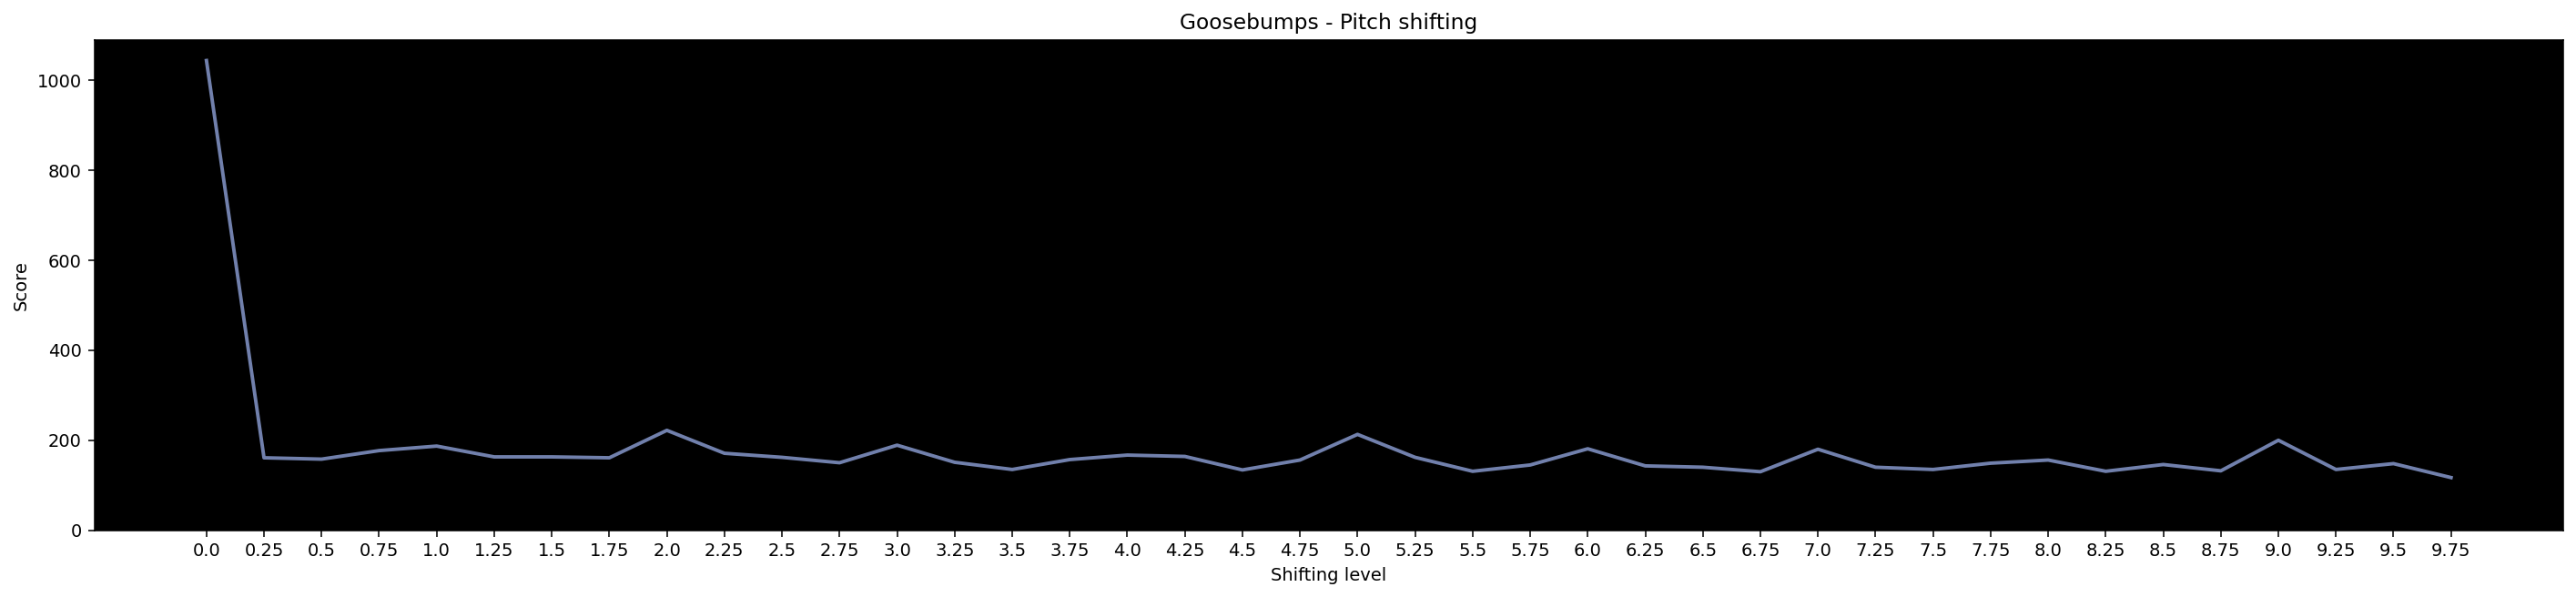

In [22]:
plt.figure(figsize = (25, 5))
plt.title('Goosebumps - Pitch shifting')
plt.plot(os.listdir('pitch/goosebumps/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/goosebumps/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [23]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Pitch change level', 'Guessed song'])
df['Pitch change level'] = df['Pitch change level'].apply(lambda x: x.strip('.wav').replace('pitched_', ''))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Pitch change level', inplace = True)
df

,Guessed song
Pitch change level,
0.0,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
0.25,Miley Cyrus - Flowers (Official Video)
0.5,BAD BUNNY x DRAKE - MÍA (Video Oficial)
0.75,Gotye - Somebody That I Used To Know (feat. Ki...
1.0,BAD BUNNY - CALLAÍTA (Video Oficial)
1.25,Olivia Rodrigo - obsessed (Official Music Video)
1.5,Olivia Rodrigo - obsessed (Official Music Video)
1.75,Harry Styles - Treat People With Kindness (Off...
2.0,Miley Cyrus - Flowers (Official Video)


### Save Your Tears - Time stretching/Pitch shifting

In [25]:
f.create_pitched_files('converted_memo/original/The Weeknd - Save Your Tears (Official Audio).wav', 'pitch/tears')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/tears/', database, song_name_index)

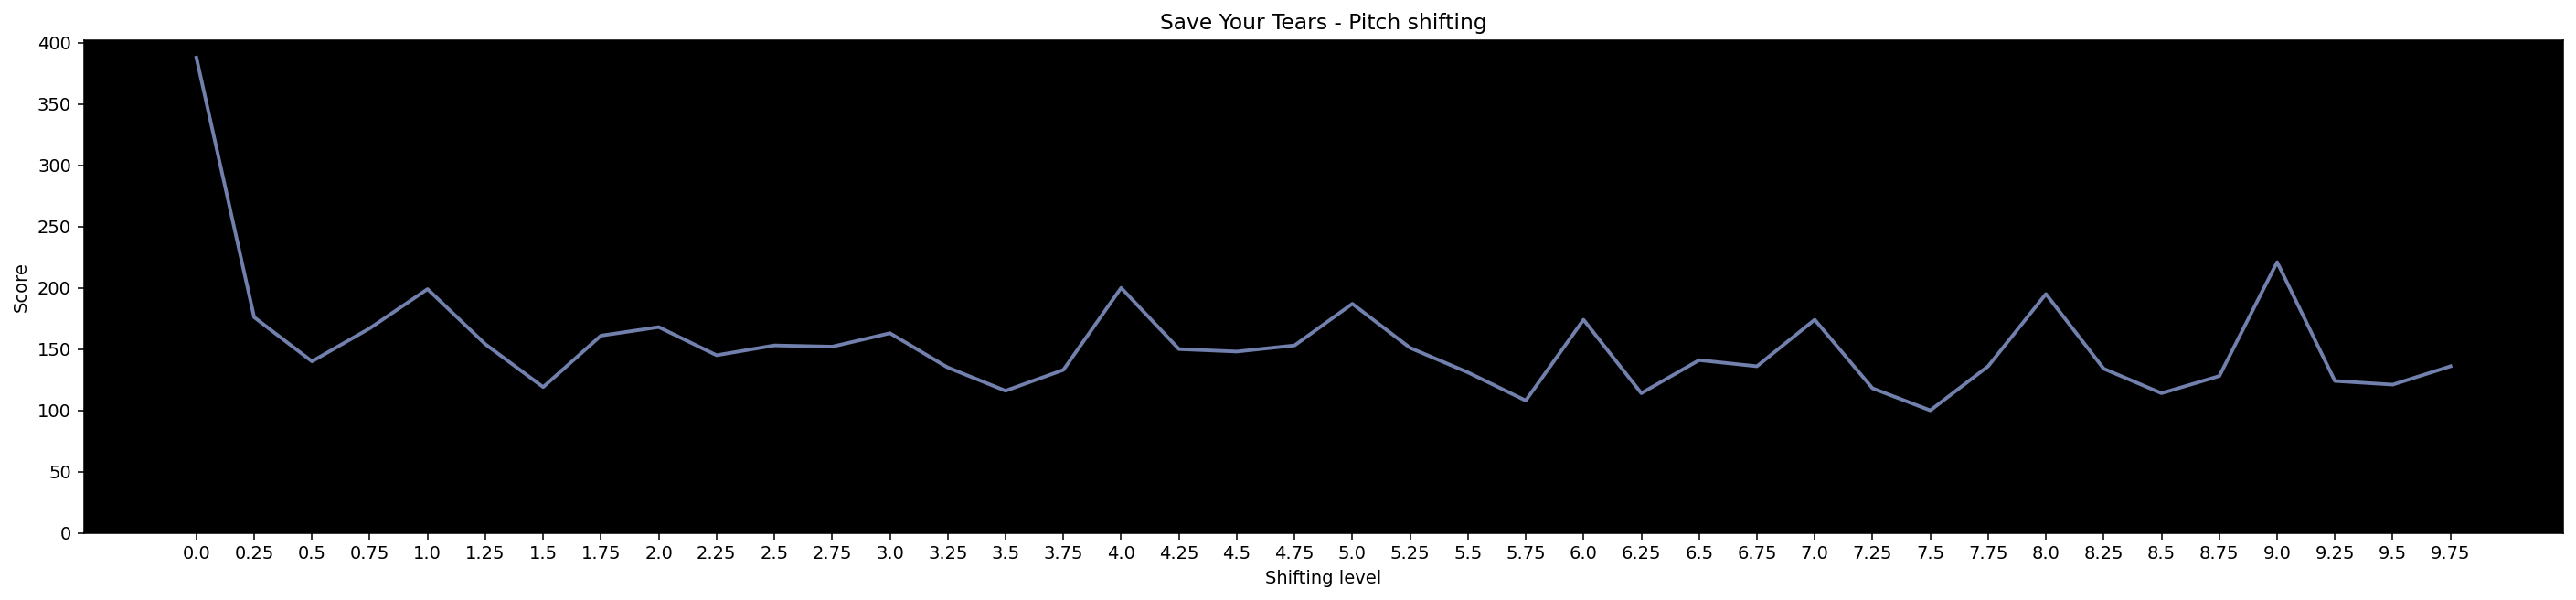

In [26]:
plt.figure(figsize = (25, 5))
plt.title('Save Your Tears - Pitch shifting')
plt.plot(os.listdir('pitch/tears/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/tears/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [27]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Pitch change level', 'Guessed song'])
df['Pitch change level'] = df['Pitch change level'].apply(lambda x: x.strip('.wav').replace('pitched_', ''))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Pitch change level', inplace = True)
df

,Guessed song
Pitch change level,
0.0,The Weeknd - Save Your Tears (Official Audio)
0.25,Billie Eilish - What Was I Made For (Official ...
0.5,Olivia Rodrigo - obsessed (Official Music Video)
0.75,Artemas - i like the way you kiss me (lyric vi...
1.0,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1.25,Lil Nas X - Old Town Road (Official Video) ft....
1.5,The Weeknd - Blinding Lights (Official Audio)
1.75,BAD BUNNY - CALLAÍTA (Video Oficial)
2.0,Justin Bieber - Anyone (Visualizer)


### POPSTAR - Time stretching/Pitch shifting

In [28]:
f.create_pitched_files('converted_memo/original/DJ Khaled ft. Drake - POPSTAR (Official Audio).wav', 'pitch/popstar')
list_of_right_songs, scores = f.scores_for_different_noise('pitch/popstar/', database, song_name_index)

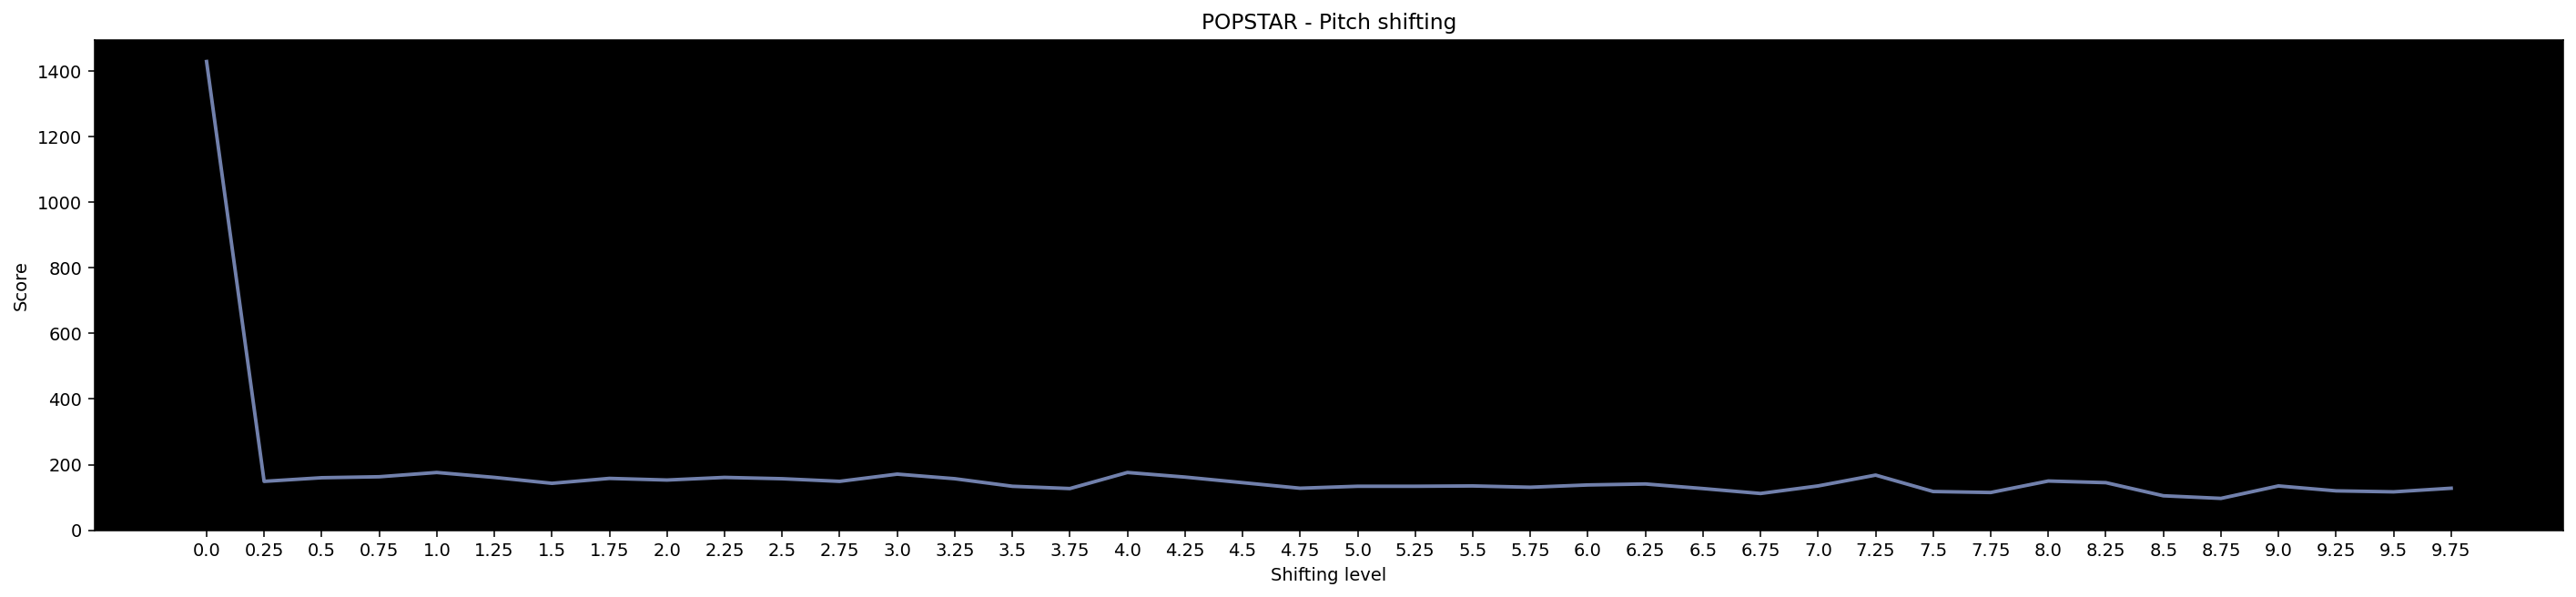

In [29]:
plt.figure(figsize = (25, 5))
plt.title('POPSTAR - Pitch shifting')
plt.plot(os.listdir('pitch/popstar/'), scores)
plt.xticks(labels = [x for x in np.arange(0, 10, 0.25)], ticks = os.listdir('pitch/popstar/'))
plt.xlabel('Shifting level')
plt.ylabel('Score')
plt.ylim(0)
plt.show()

In [30]:
df = pd.DataFrame(list_of_right_songs.items(), columns = ['Pitch change level', 'Guessed song'])
df['Pitch change level'] = df['Pitch change level'].apply(lambda x: x.strip('.wav').replace('pitched_', ''))
df['Guessed song'] = df['Guessed song'].apply(lambda x: x.strip('.wav').strip('converted/'))
df.set_index('Pitch change level', inplace = True)
df

,Guessed song
Pitch change level,
0.0,DJ Khaled ft. Drake - POPSTAR (Official Audio)
0.25,Olivia Rodrigo - obsessed (Official Music Video)
0.5,The Weeknd - Blinding Lights (Official Audio)
0.75,"Travis Scott, HVME - Goosebumps (Remix - Offic..."
1.0,Artemas - i like the way you kiss me (lyric vi...
1.25,Dua Lipa - Houdini (Official Music Video)
1.5,wenty one pilots Heathens (from Suicide Squad ...
1.75,Gotye - Somebody That I Used To Know (feat. Ki...
2.0,Justin Bieber - Anyone (Visualizer)


# Shorter samples

In [31]:
f.shorten_file(20, 'converted_memo/original', 'converted_memo/20_sec')
f.shorten_file(10, 'converted_memo/original', 'converted_memo/10_sec')
f.shorten_file(5, 'converted_memo/original', 'converted_memo/5_sec')
f.shorten_file(3, 'converted_memo/original', 'converted_memo/3_sec')
f.shorten_file(1, 'converted_memo/original', 'converted_memo/1_sec')
f.shorten_file(0.5, 'converted_memo/original', 'converted_memo/0.5_sec')
list_of_scores = [f.scores_different_lenght('converted_memo/0.5_sec', database, song_name_index), f.scores_different_lenght('converted_memo/1_sec', database, song_name_index), f.scores_different_lenght('converted_memo/3_sec', database, song_name_index), f.scores_different_lenght('converted_memo/5_sec', database, song_name_index), f.scores_different_lenght('converted_memo/10_sec', database, song_name_index), f.scores_different_lenght('converted_memo/20_sec', database, song_name_index)]

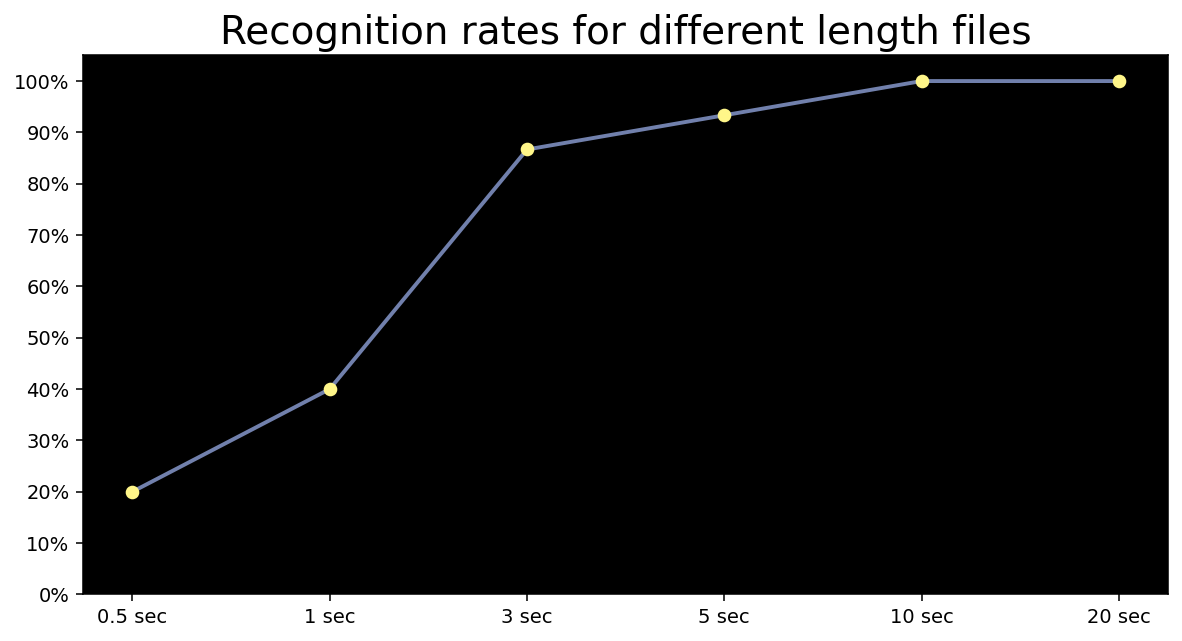

In [32]:
plt.figure(figsize = (10, 5))
plt.title('Recognition rates for different length files', fontsize = 20)
plt.plot(np.array(list_of_scores) / 15 * 100, zorder = 1)
plt.scatter([0, 1, 2, 3, 4, 5], np.array(list_of_scores) / 15 * 100, color = '#FFF689', zorder = 2)
plt.ylim(0, 105)
plt.yticks(labels = [str(x)+'%' for x in np.arange(0, 110, 10)], ticks = np.arange(0, 110, 10))
plt.xticks(labels = ['0.5 sec', '1 sec', '3 sec','5 sec', '10 sec', '20 sec'], ticks = [0, 1, 2, 3, 4, 5])
plt.show()

### remove files

In [33]:
f.remove_created_audio_files_end('white_noise')
f.remove_created_audio_files_end('pitch')
f.remove_created_audio_files_end('clipping')
f.remove_short_recordings_end('converted_memo')

----------------------
deleted files in directory white_noise/goosebumps
deleted files in directory white_noise/popstar
deleted files in directory white_noise/tears
----------------------
----------------------
deleted files in directory pitch/goosebumps
deleted files in directory pitch/popstar
deleted files in directory pitch/tears
----------------------
----------------------
deleted files in directory clipping/goosebumps
deleted files in directory clipping/popstar
deleted files in directory clipping/tears
----------------------
Removed files in converted_memo/10_sec
Removed files in converted_memo/5_sec
Removed files in converted_memo/20_sec
Removed files in converted_memo/1_sec
Removed files in converted_memo/3_sec
Removed files in converted_memo/0.5_sec
